In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## custom classes
from CustomImputer import CheckingForValues
from CustomImputer import FillMissingValues
from CustomImputer import FillMissingValuesPower

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

import tensorflow as tf

sns.set()
tf.__version__

'2.1.0'

## Get the Data

In [60]:
rawData = pd.read_csv('source/cars.csv', encoding='iso-8859-1')
rawData.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [61]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [62]:
rawData.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


## Visualizing the data

In [63]:
rawData.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [64]:
### GETTING THE DATA FOR THE MISSING VALUS ###

visualizations = rawData.isnull().sum()
visualizations = pd.DataFrame(visualizations)
visualizations

,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209
powerPS,0


In [65]:
vehicleNull = visualizations.iloc[6:7, 0]
vehicleNull = vehicleNull[0]

gearBoxNull = visualizations.iloc[8:9, 0]
gearBoxNull = gearBoxNull[0]

modelNull = visualizations.iloc[10:11, 0]
modelNull = modelNull[0]

fuelNull = visualizations.iloc[13:14, 0]
fuelNull = fuelNull[0]

repairNull = visualizations.iloc[15:16, 0]
repairNull = repairNull[0]

In [66]:
rawData.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [67]:
### Checking for string 0

priceNull = rawData[rawData['price']==0].count()
priceNull = priceNull[0]

PSNull = rawData[rawData['powerPS']==0].count()
PSNull = PSNull[0]

registrationNull = rawData[rawData['yearOfRegistration']==0].count()
registrationNull = registrationNull[0]


kilometerNull = rawData[rawData['kilometer']==0].count()
kilometerNull = kilometerNull[0]


In [68]:
count = rawData.count()
count

dateCrawled            371528
name                   371528
seller                 371528
offerType              371528
price                  371528
abtest                 371528
vehicleType            333659
yearOfRegistration     371528
gearbox                351319
powerPS                371528
model                  351044
kilometer              371528
monthOfRegistration    371528
fuelType               338142
brand                  371528
notRepairedDamage      299468
dateCreated            371528
nrOfPictures           371528
postalCode             371528
lastSeen               371528
dtype: int64

In [69]:
PR = count[4]
VT = count[6]
YR = count[7]
GB = count[8]
PS = count[9]
MD = count[10]
KM = count[11]
FT = count[13]
BD = count[14]
RP = count[15]

In [70]:
## DataFrame for missing values

missing = pd.DataFrame({'Name of the column':['Vehicle Type',
                                              'Year of Registration',
                                              'Gear Box',
                                              'Power PS',
                                              'Model',
                                              'Kilometer',
                                              'Fuel Type',
                                              'Repaired',
                                              'Price'],
                        'Total Values':[VT, YR, GB, PS, MD, KM, FT, RP, PR],
                        'Missing Values':[vehicleNull,
                                          registrationNull,
                                          gearBoxNull,
                                          PSNull,
                                          modelNull,
                                          kilometerNull,
                                          fuelNull,
                                          repairNull,
                                          priceNull]})

missing

,Name of the column,Total Values,Missing Values
0,Vehicle Type,333659,37869
1,Year of Registration,371528,0
2,Gear Box,351319,20209
3,Power PS,371528,40820
4,Model,351044,20484
5,Kilometer,371528,0
6,Fuel Type,338142,33386
7,Repaired,299468,72060
8,Price,371528,10778


In [71]:
missing['Present Values'] = missing['Total Values'] - missing['Missing Values']
missing

,Name of the column,Total Values,Missing Values,Present Values
0,Vehicle Type,333659,37869,295790
1,Year of Registration,371528,0,371528
2,Gear Box,351319,20209,331110
3,Power PS,371528,40820,330708
4,Model,351044,20484,330560
5,Kilometer,371528,0,371528
6,Fuel Type,338142,33386,304756
7,Repaired,299468,72060,227408
8,Price,371528,10778,360750


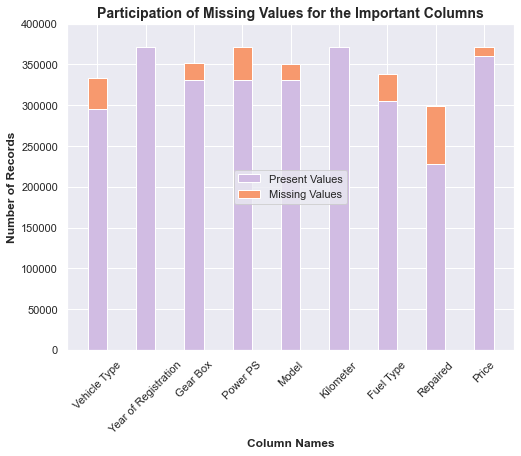

In [72]:
plt.figure(figsize=(8,6))
plt.bar(x = missing['Name of the column'],
        height = missing['Present Values'],
        width = 0.4,
        color = '#D1BCE3')

plt.bar(x = missing['Name of the column'],
        height = missing['Missing Values'],
        width = 0.4,
        bottom =  missing['Present Values'],
        color = '#F7996E')

plt.title('Participation of Missing Values for the Important Columns', 
          fontsize = 14,
          fontweight = 'bold')

plt.xlabel('Column Names', 
fontsize = 12,
fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Number of Records', 
fontsize = 12,
fontweight = 'bold')
plt.ylim(bottom = 0, top = 400000)

plt.legend(['Present Values','Missing Values'], loc = 10)
plt.savefig('Visualizations/PNG/missingValues.png', dpi=400)
plt.show()

In [73]:
rawData.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [74]:
rawData.drop(rawData[['dateCrawled', 'name', 'seller', 'offerType', 'abtest','monthOfRegistration',
'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']], axis=1, inplace=True)

In [75]:
preprocessing = rawData.copy()
preprocessing.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [76]:
preprocessing = preprocessing[['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'price']]

In [77]:
preprocessing.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price
0,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,480
1,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,18300
2,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,9800
3,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,3600


## Prepare the data for the Machine Learning Algorithm

In [78]:
## transforming text values (by hand)
preprocessing['gearbox'] = preprocessing['gearbox'].map({'manuell':1, 'automatik':0})
preprocessing['notRepairedDamage'] = preprocessing['notRepairedDamage'].map({'ja':1, 'nein':0})

In [79]:
preprocessing.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price
0,NaN,1993,1.0,0,golf,150000,benzin,volkswagen,NaN,480
1,coupe,2011,1.0,190,NaN,125000,diesel,audi,1.0,18300
2,suv,2004,0.0,163,grand,125000,diesel,jeep,NaN,9800
3,kleinwagen,2001,1.0,75,golf,150000,benzin,volkswagen,0.0,1500
4,kleinwagen,2008,1.0,69,fabia,90000,diesel,skoda,0.0,3600


In [80]:
preprocessing.isnull().sum()

vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
price                     0
dtype: int64

In [81]:
preprocessing.drop(preprocessing[preprocessing['fuelType']=='andere'].index, inplace=True)

In [82]:
preprocessing.groupby(by=['fuelType']).sum()

,yearOfRegistration,gearbox,powerPS,kilometer,notRepairedDamage,price
fuelType,,,,,,
benzin,448248009,179256.0,24888455,27434525000,23143.0,1988651748
cng,1147374,518.0,56447,72550000,53.0,2666079
diesel,216167171,70777.0,14427348,14166815000,8393.0,1261959727
elektro,208878,13.0,9055,4775000,10.0,1904680
hybrid,558614,46.0,32220,23225000,18.0,4050268
lpg,10767338,3220.0,804639,761895000,695.0,55742324


In [83]:
prices = pd.DataFrame({
    'vehicleType':['bus',
                   'cabrio',
                   'coupe',
                   'kleinwagen',
                   'kombi',
                   'limousine',
                   'suv'],
    'VolksWagen':   [9236, 6552, 14854, 9255, 5756, 10845, 15899],
    'BMW':          [27570, 37973, 32091, 4433, 8998, 3611, 15924],
    'Opel':         [4404, 4413, 3367, 2062, 3271, 4483, 7451],
    'Mercedes Benz':[44779, 16242, 42379, 2275, 6833, 13992, 16993],
    'Audi':         [3485, 13441, 16342, 7358, 17060, 16231, 24621],
    'Ford':         [6028, 5471, 8207, 2254, 5585, 30995, 11399],
    'Renault':      [3087, 4133, 6039, 1750, 3005, 2272, 9280],
    'Peugeot':      [5081, 4570, 6761, 2092, 3410, 3221, 11954],
    'Fiat':         [4015, 6486, 3801, 4809, 2076, 2490, 8527],
    'SEAT':         [7063, 0, 5552, 3022, 6852, 5821, 8712],
    'Skoda':        [6650, 7723, 3533, 4390, 7328, 5327, 14390]
    })
prices

,vehicleType,VolksWagen,BMW,Opel,Mercedes Benz,Audi,Ford,Renault,Peugeot,Fiat,SEAT,Skoda
0,bus,9236,27570,4404,44779,3485,6028,3087,5081,4015,7063,6650
1,cabrio,6552,37973,4413,16242,13441,5471,4133,4570,6486,0,7723
2,coupe,14854,32091,3367,42379,16342,8207,6039,6761,3801,5552,3533
3,kleinwagen,9255,4433,2062,2275,7358,2254,1750,2092,4809,3022,4390
4,kombi,5756,8998,3271,6833,17060,5585,3005,3410,2076,6852,7328
5,limousine,10845,3611,4483,13992,16231,30995,2272,3221,2490,5821,5327
6,suv,15899,15924,7451,16993,24621,11399,9280,11954,8527,8712,14390


In [84]:
check = CheckingForValues(preprocessing)
fill = FillMissingValues(prices, preprocessing)

In [85]:
fill.InputMissingValue('volkswagen', 'VolksWagen', returnArg=False)
fill.InputMissingValue('volkswagen', 'VolksWagen', value=1, returnArg=False)

fill.InputMissingValue('bmw', 'BMW', returnArg=False)
fill.InputMissingValue('bmw', 'BMW', value=1, returnArg=False)

fill.InputMissingValue('opel', 'Opel', returnArg=False)
fill.InputMissingValue('opel', 'Opel', value=1, returnArg=False)

fill.InputMissingValue('mercedes_benz', 'Mercedes Benz', returnArg=False)
fill.InputMissingValue('mercedes_benz', 'Mercedes Benz', value=1, returnArg=False)

fill.InputMissingValue('audi', 'Audi', returnArg=False)
fill.InputMissingValue('audi', 'Audi', value=1, returnArg=False)

fill.InputMissingValue('ford', 'Ford', returnArg=False)
fill.InputMissingValue('ford', 'Ford', value=1, returnArg=False)

fill.InputMissingValue('renault', 'Renault', returnArg=False)
fill.InputMissingValue('renault', 'Renault', value=1, returnArg=False)

fill.InputMissingValue('peugeot', 'Peugeot', returnArg=False)
fill.InputMissingValue('peugeot', 'Peugeot', value=1, returnArg=False)

fill.InputMissingValue('fiat', 'Fiat', returnArg=False)
fill.InputMissingValue('fiat', 'Fiat', value=1, returnArg=False)

fill.InputMissingValue('seat', 'SEAT', returnArg=False)
fill.InputMissingValue('seat', 'SEAT', value=1, returnArg=False)

fill.InputMissingValue('skoda', 'Skoda', returnArg=False)
fill.InputMissingValue('skoda', 'Skoda', value=1, returnArg=False)

In [86]:
preprocessing[preprocessing['powerPS']==0]

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price
0,NaN,1993,1.0,0,golf,150000,benzin,volkswagen,NaN,480
15,kleinwagen,1910,NaN,0,ka,5000,benzin,ford,NaN,450
32,limousine,1994,NaN,0,golf,150000,benzin,volkswagen,0.0,245
37,NaN,2016,NaN,0,kangoo,150000,diesel,renault,0.0,1500
40,NaN,1990,NaN,0,corsa,150000,benzin,opel,NaN,0
...,...,...,...,...,...,...,...,...,...,...
371495,NaN,1995,NaN,0,NaN,125000,benzin,opel,NaN,180
371504,NaN,2005,0.0,0,c_klasse,150000,NaN,mercedes_benz,NaN,2600
371521,bus,2000,1.0,0,zafira,150000,benzin,opel,0.0,1150
371522,NaN,2005,1.0,0,colt,150000,benzin,mitsubishi,1.0,0


In [87]:
preprocessing.drop(['model'], axis=1, inplace=True) # droping the model column

indexZero = preprocessing[preprocessing['price']==0].index
indexOne = preprocessing[preprocessing['price']==1].index
preprocessing.drop(indexZero, inplace=True ) # droping the remaining missing valus in price column
preprocessing.drop(indexOne, inplace=True )

preprocessing.dropna(subset=['vehicleType'], inplace=True) # droping missing values from vehicleType column

In [88]:
fillPower =  FillMissingValuesPower(preprocessing)

In [89]:
fillPower.avgPowerInput(95)

Int64Index([    15,     32,     54,     55,     70,     71,     92,    101,
               114,    163,
            ...
            371374, 371375, 371417, 371424, 371443, 371457, 371473, 371489,
            371492, 371521],
           dtype='int64', length=24342)

In [90]:
preprocessing.isnull().sum()

vehicleType               0
yearOfRegistration        0
gearbox                9903
powerPS                   0
kilometer                 0
fuelType              15625
brand                     0
notRepairedDamage     50683
price                     0
dtype: int64

In [91]:
preprocessing.loc[(preprocessing['notRepairedDamage']>1), 'notRepairedDamage'] = 1

In [92]:
median = preprocessing.loc[:, 'gearbox'].median()
preprocessing.loc[:,'gearbox'] = preprocessing.loc[:,'gearbox'].fillna(value=median)

In [93]:
median = preprocessing.loc[:, 'notRepairedDamage'].median()
preprocessing.loc[:,'notRepairedDamage'] = preprocessing.loc[:,'notRepairedDamage'].fillna(value=median)
preprocessing.isnull().sum()

vehicleType               0
yearOfRegistration        0
gearbox                   0
powerPS                   0
kilometer                 0
fuelType              15625
brand                     0
notRepairedDamage         0
price                     0
dtype: int64

In [94]:
andere = preprocessing[preprocessing['vehicleType']=='andere'].index
preprocessing.drop(andere, inplace=True) # droping the "andere" vehicleType from the dataSet

In [95]:
preprocessing['fuelType'] = preprocessing['fuelType'].fillna(value = 'diesel', limit=5000)
preprocessing['fuelType'] = preprocessing['fuelType'].fillna(value = 'benzin', limit=10313)

In [96]:
preprocessing.isnull().sum()

vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
price                 0
dtype: int64

In [97]:
# preprocessing.to_excel('cleanDataSet/cars.xlsx')
# preprocessing.to_csv('cleanDataSet/cars.csv')

In [98]:
X = preprocessing.iloc[:,0:-1].values # Independent variables
Y = preprocessing.iloc[:,-1].values # Dependent variable

In [99]:
X

array([['coupe', 2011, 1.0, ..., 'diesel', 'audi', 1.0],
       ['suv', 2004, 0.0, ..., 'diesel', 'jeep', 0.0],
       ['kleinwagen', 2001, 1.0, ..., 'benzin', 'volkswagen', 0.0],
       ...,
       ['bus', 1996, 1.0, ..., 'diesel', 'volkswagen', 0.0],
       ['kombi', 2002, 1.0, ..., 'diesel', 'volkswagen', 0.0],
       ['limousine', 2013, 1.0, ..., 'benzin', 'bmw', 0.0]], dtype=object)

In [100]:
X[:,0] = LabelEncoder().fit_transform(X[:,0])
X[:,5] = LabelEncoder().fit_transform(X[:,5])
X[:,6] = LabelEncoder().fit_transform(X[:,6])

In [101]:
column = ColumnTransformer(
    transformers=[(
        'encoder',
        OneHotEncoder(),
        [0, 5, 6]
    )],
    remainder='passthrough'
)

In [102]:
np.set_printoptions(suppress=True)

In [103]:
X

array([[2, 2011, 1.0, ..., 2, 1, 1.0],
       [6, 2004, 0.0, ..., 2, 14, 0.0],
       [3, 2001, 1.0, ..., 0, 38, 0.0],
       ...,
       [0, 1996, 1.0, ..., 2, 38, 0.0],
       [4, 2002, 1.0, ..., 2, 38, 0.0],
       [5, 2013, 1.0, ..., 0, 2, 0.0]], dtype=object)

In [104]:
X = column.fit_transform(X).toarray()

In [105]:
X

array([[     0.,      0.,      1., ...,    190., 125000.,      1.],
       [     0.,      0.,      0., ...,    163., 125000.,      0.],
       [     0.,      0.,      0., ...,     75., 150000.,      0.],
       ...,
       [     1.,      0.,      0., ...,    102., 150000.,      0.],
       [     0.,      0.,      0., ...,    100., 150000.,      0.],
       [     0.,      0.,      0., ...,    320.,  50000.,      0.]])

In [106]:
# np.savez_compressed('cleanDataSet/numpyFile.npz', X)

In [107]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=43)

In [108]:
xTrain

array([[     0.,      0.,      0., ...,    140.,  50000.,      0.],
       [     0.,      0.,      0., ...,     95., 150000.,      1.],
       [     0.,      0.,      0., ...,    150., 150000.,      0.],
       ...,
       [     0.,      0.,      0., ...,    101., 150000.,      0.],
       [     0.,      0.,      0., ...,    116., 150000.,      1.],
       [     1.,      0.,      0., ...,    131.,  70000.,      0.]])

In [109]:
yTrain

array([15500,   620,  4799, ...,  2500,  1450,  9999], dtype=int64)

In [110]:
xTrain = StandardScaler().fit_transform(xTrain)
xTest = StandardScaler().fit_transform(xTest)
yTrain = StandardScaler().fit_transform(yTrain.reshape(-1,1))
yTest = StandardScaler().fit_transform(yTest.reshape(-1,1))

## Selecting the model and train it